# Glass Prediction Analysis

# Column Info :
* RI: refractive index
* NA: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
* NA: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
* Mg: Magnesium
* Al: Aluminum
* K: Potassium
* Ca: Calcium
* Ba: Barium
* Fe: Iron

# Goal :
* The goal of this project is to build a machine learning model with highest accuracy, which will predict the glasses based on the given inputs.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style("darkgrid")

In [6]:
data = pd.read_csv(r"C:\Users\hp\Desktop\New folder\Python Object and Data Structure Basics\csv file\All Files\All Files\Glass_Dataset.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [8]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [10]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

# Exploratory Data Analysis (EDA)

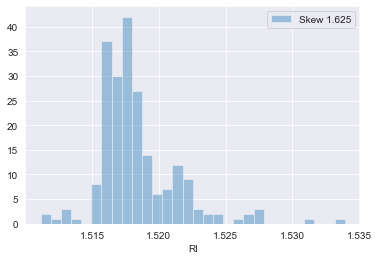

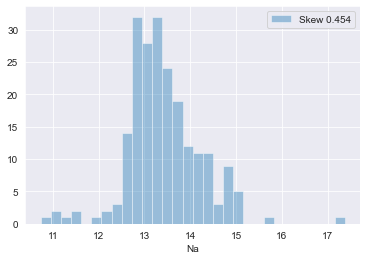

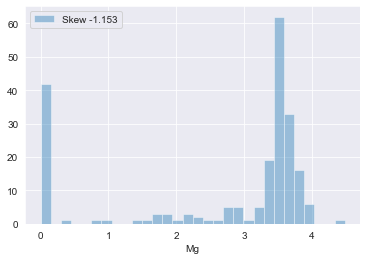

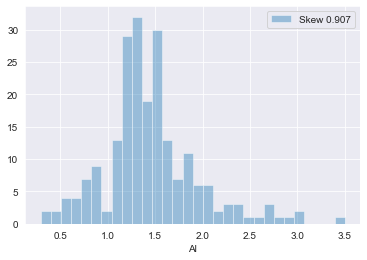

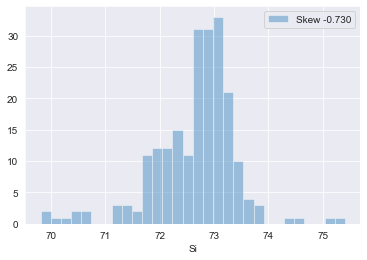

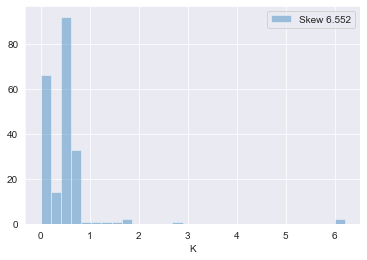

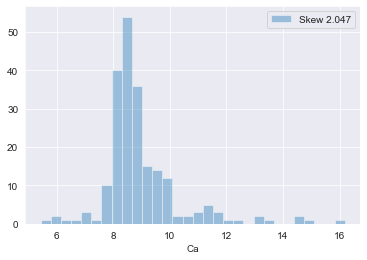

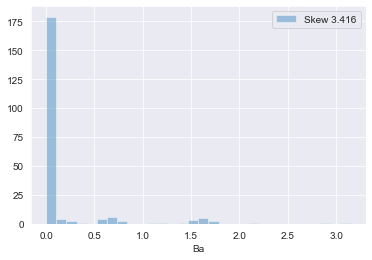

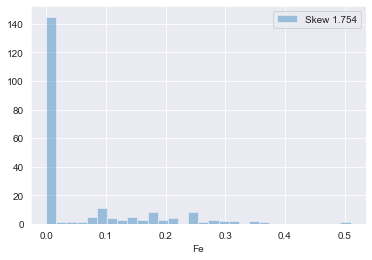

In [13]:
features = data.columns[:-1].tolist()
for feat in features:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde = False, label = 'Skew %.3f' %(skew), bins= 30)
    plt.legend(loc='best')
    plt.show()

In [20]:
def outlier_hunt(data):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in data.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(data[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(data[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(data[features]))))   

The dataset contains 14 observations with more than 2 outliers


<Figure size 576x576 with 0 Axes>

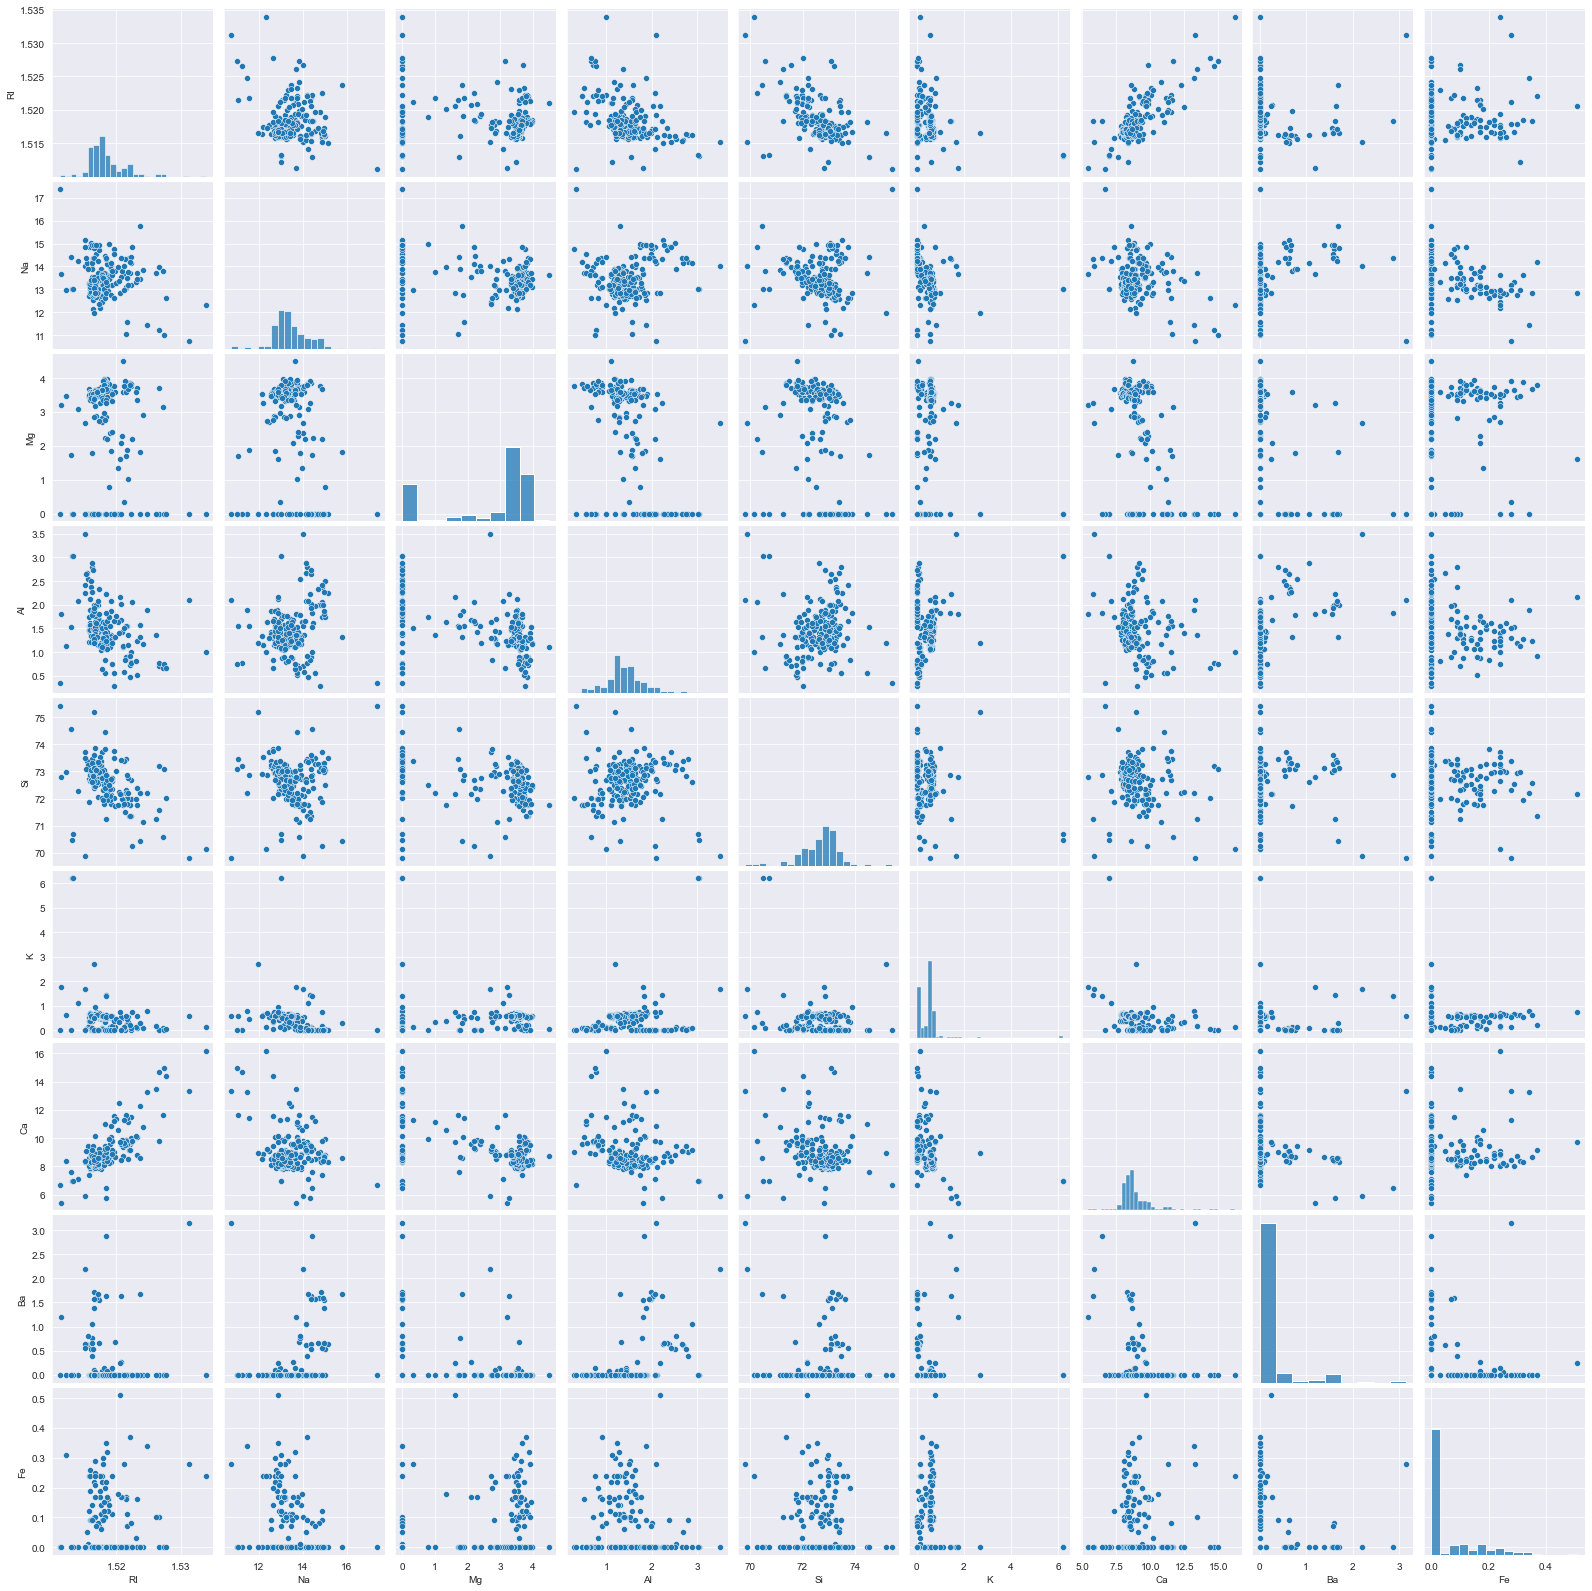

In [22]:
plt.figure(figsize=(8,8))
sns.pairplot(data[features], palette= 'coolwarm')
plt.show()

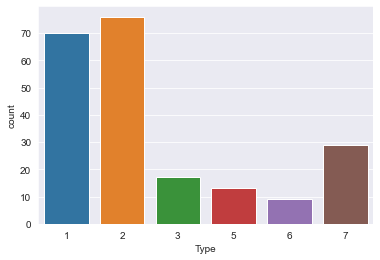

In [23]:
sns.countplot(data['Type'])
plt.show()

In [25]:
#spliting data into X and Y part
X = data.drop('Type', axis=1).values
y = data['Type'].values.reshape(-1,1)

In [26]:
X

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [29]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.25)

In [31]:
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (160, 9)
Shape of X_test (54, 9)
Shape of y_train (160, 1)
Shape of y_test (54, 1)


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from time import time
from sklearn.metrics import f1_score
from os import path, makedirs, walk
from joblib import dump, load
import json
from sklearn import metrics


In [34]:
pd.DataFrame(data.corr().round(2))

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.00,-0.19,-0.12,-0.41,-0.54,-0.29,0.81,-0.00,0.14,-0.16
Na,-0.19,1.00,-0.27,0.16,-0.07,-0.27,-0.28,0.33,-0.24,0.50
Mg,-0.12,-0.27,1.00,-0.48,-0.17,0.01,-0.44,-0.49,0.08,-0.74
Al,-0.41,0.16,-0.48,1.00,-0.01,0.33,-0.26,0.48,-0.07,0.60
Si,-0.54,-0.07,-0.17,-0.01,1.00,-0.19,-0.21,-0.10,-0.09,0.15
K,-0.29,-0.27,0.01,0.33,-0.19,1.00,-0.32,-0.04,-0.01,-0.01
Ca,0.81,-0.28,-0.44,-0.26,-0.21,-0.32,1.00,-0.11,0.12,0.00
Ba,-0.00,0.33,-0.49,0.48,-0.10,-0.04,-0.11,1.00,-0.06,0.58
Fe,0.14,-0.24,0.08,-0.07,-0.09,-0.01,0.12,-0.06,1.00,-0.19
Type,-0.16,0.50,-0.74,0.60,0.15,-0.01,0.00,0.58,-0.19,1.00


# Logistic Regression

In [35]:
logReg = LogisticRegression(max_iter= 5000)
logReg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [36]:
logReg.score(X_train, y_train)

0.63125

In [37]:
logReg.score(X_test, y_test)

0.6481481481481481

In [38]:
y_pred_dt_test = logReg.predict(X_test)

In [39]:
print("Accuracy of Logistic Regression Model :", metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Logistic Regression Model : 0.6481481481481481


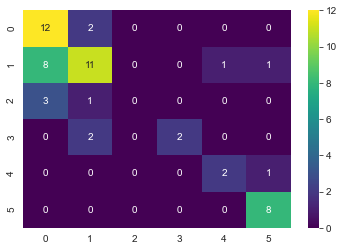

In [40]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot= True, cmap = 'viridis', fmt= '.0f')
plt.show()

# Decision Tree Classifier

In [41]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
dtc.score(X_train, y_train)

1.0

In [45]:
dtc.score(X_test, y_test)

0.6666666666666666

In [46]:
dtce = DecisionTreeClassifier(criterion= 'entropy')

In [48]:
dtce.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [49]:
dtce.score(X_train, y_train)

1.0

In [50]:
dtce.score(X_test, y_test)

0.7407407407407407

In [51]:
y_pred_dt_test = dtc.predict(X_test)

In [52]:
print("Accuracy score of Decision Tree Classifier Model:", metrics.accuracy_score(y_test, y_pred_dt_test))

Accuracy score of Decision Tree Classifier Model: 0.6666666666666666


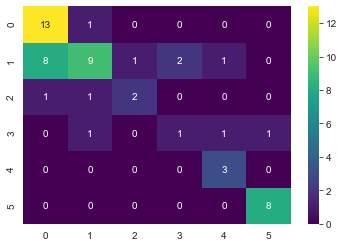

In [53]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot= True, cmap= 'viridis', fmt= '.0f')
plt.show()

# Random Forest Classifier Algorithm

In [54]:
rfc = RandomForestClassifier()

In [55]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
rfc.score(X_train, y_train)

1.0

In [58]:
rfc.score(X_test, y_test)

0.7962962962962963

In [59]:
y_pred_dt_test = rfc.predict(X_test)

In [60]:
y_pred_dt_test

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 5, 1, 1, 2, 3, 2, 1, 7, 5, 1, 1, 7, 1, 7, 1, 2,
       1, 6, 2, 1, 5, 2, 1, 1, 1, 2], dtype=int64)

In [61]:
print("Accuracy score of Random Forest Classifier Model :", metrics.accuracy_score(y_test, y_pred_dt_test))

Accuracy score of Random Forest Classifier Model : 0.7962962962962963


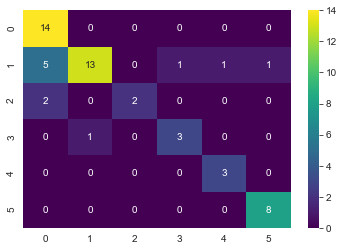

In [62]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot= True, cmap = 'viridis', fmt= '.0f')
plt.show()

# K-Nearest Neighbours Algorithm

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
classifier = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p=2)

In [65]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
classifier.score(X_train, y_train)

0.7375

In [67]:
classifier.score(X_test, y_test)

0.6296296296296297

In [69]:
y_pred_dt_test = classifier.predict(X_test)

In [70]:
print("Accuracy Score of the KNN Classifier Model :", metrics.accuracy_score(y_test, y_pred_dt_test))

Accuracy Score of the KNN Classifier Model : 0.6296296296296297


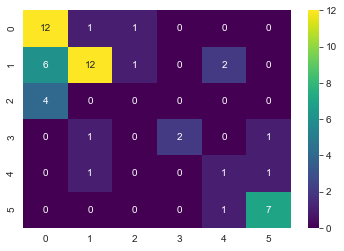

In [71]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot= True, cmap = 'viridis', fmt= '.0f')
plt.show()

# Gaussian NB Algorithm

In [72]:
gnb = GaussianNB()

In [73]:
gnb.fit(X_train, y_train)

GaussianNB()

In [74]:
gnb.score(X_train, y_train)

0.3125

In [75]:
gnb.score(X_test, y_test)

0.35185185185185186

In [76]:
y_pred_dt_test = gnb.predict(X_test)

In [77]:
y_pred_dt_test

array([3, 7, 3, 7, 3, 5, 3, 3, 3, 3, 6, 2, 1, 3, 6, 2, 7, 3, 3, 6, 3, 7,
       7, 7, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 7, 5, 3, 3, 7, 2, 7, 3, 3,
       1, 6, 2, 3, 2, 3, 3, 3, 3, 3], dtype=int64)

In [78]:
print("Accuracy Score of Gaussian NB Classifier Model :", metrics.accuracy_score(y_test, y_pred_dt_test))

Accuracy Score of Gaussian NB Classifier Model : 0.35185185185185186


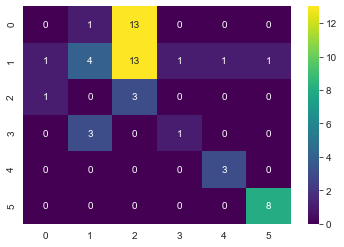

In [79]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot = True, cmap= 'viridis', fmt= '.0f')
plt.show()

# Support Vector Machine Algorithm

In [80]:
classifier_svm = SVC()

In [82]:
classifier_svm.fit(X_train, y_train)

SVC()

In [83]:
classifier_svm.score(X_train, y_train)

0.35

In [84]:
classifier_svm.score(X_test, y_test)

0.25925925925925924

In [85]:
y_pred_dt_test = classifier_svm.predict(X_test)

In [86]:
y_pred_dt_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [87]:
print("Accuracy score of SVM Model :", metrics.accuracy_score(y_test, y_pred_dt_test))

Accuracy score of SVM Model : 0.25925925925925924


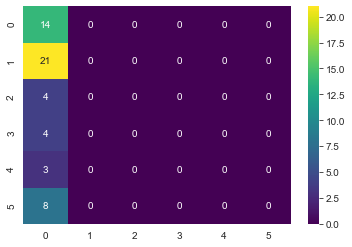

In [88]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot= True, cmap = 'viridis', fmt= '.0f')
plt.show()

# XGBoost Classifier

In [89]:
from xgboost import XGBClassifier

In [90]:
xg = XGBClassifier()

In [91]:
xg.fit(X_train, y_train)

[01:32:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
xg.score(X_train, y_train)

1.0

In [93]:
xg.score(X_test, y_test)

0.8148148148148148

In [94]:
y_pred_dt_test = xg.predict(X_test)

In [95]:
y_pred_dt_test

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 6, 2, 2, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 2, 1, 2, 2, 3, 2, 1, 7, 5, 1, 1, 7, 2, 7, 1, 2,
       1, 6, 2, 1, 5, 2, 1, 1, 1, 2], dtype=int64)

In [96]:
print("Accuracy Score of XGBoost Classifier Model :", metrics.accuracy_score(y_test, y_pred_dt_test))

Accuracy Score of XGBoost Classifier Model : 0.8148148148148148


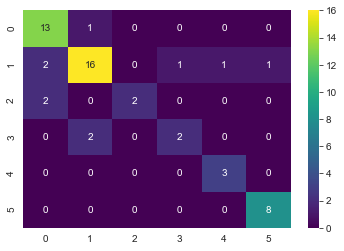

In [97]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot= True, cmap= 'viridis', fmt= '.0f')
plt.show()

# Gradient Boosting Classifier

In [98]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [100]:
gfc = GradientBoostingClassifier(n_estimators = 1000, max_leaf_nodes = 4, max_depth= None, random_state= 2,
                                min_samples_split= 5)

gfc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=None, max_leaf_nodes=4,
                           min_samples_split=5, n_estimators=1000,
                           random_state=2)

In [101]:
gfc.score(X_train, y_train)

1.0

In [102]:
gfc.score(X_test, y_test)

0.8148148148148148

In [103]:
y_pred_dt_test = gfc.predict(X_test)

In [104]:
y_pred_dt_test

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 7, 5, 1, 1, 2, 1, 7, 3, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 2], dtype=int64)

In [105]:
print("Accuracy Score of Gradient Boosting Classifier Model:", metrics.accuracy_score(y_test, y_pred_dt_test))

Accuracy Score of Gradient Boosting Classifier Model: 0.8148148148148148


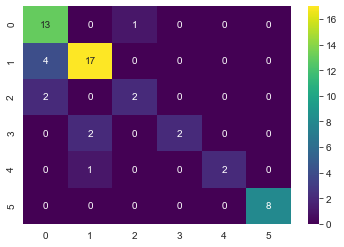

In [107]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot= True, cmap = 'viridis', fmt= '.0f')
plt.show()

# AdaBoost Classifier Algorithm

In [108]:
abc = AdaBoostClassifier(n_estimators = 100, random_state= 0)
abc.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [109]:
abc.score(X_train, y_train)

0.48125

In [110]:
abc.score(X_test, y_test)

0.48148148148148145

In [111]:
y_pred_dt_test = abc.predict(X_test)

In [112]:
y_pred_dt_test

array([1, 2, 1, 2, 1, 6, 1, 1, 1, 2, 6, 2, 1, 1, 6, 2, 2, 1, 1, 6, 2, 7,
       2, 7, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1,
       1, 6, 2, 1, 2, 1, 1, 1, 1, 1], dtype=int64)

In [113]:
print("Accuracy Score of AdaBoost Classifier Model :", metrics.accuracy_score(y_test, y_pred_dt_test))

Accuracy Score of AdaBoost Classifier Model : 0.48148148148148145


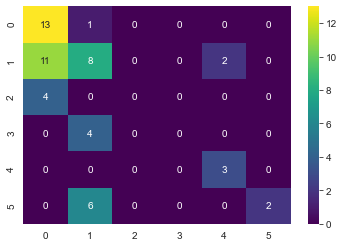

In [114]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot= True, cmap= 'viridis', fmt= '.0f')
plt.show()

# Stochastic Gradient Descent Classifier

In [117]:
from sklearn.linear_model import SGDClassifier

In [118]:
SGDClf = SGDClassifier(max_iter= 1000, tol=1e-3, penalty= 'elasticnet')

In [119]:
SGDClf.fit(X_train, y_train)

SGDClassifier(penalty='elasticnet')

In [120]:
SGDClf.score(X_train, y_train)

0.4125

In [121]:
SGDClf.score(X_test, y_test)

0.46296296296296297

In [122]:
y_pred_dt_test = SGDClf.predict(X_test)

In [123]:
y_pred_dt_test

array([2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2,
       7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 7, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [125]:
print("Accuracy Score of Stochastic Gradient Descent Classifier Model: ", metrics.accuracy_score(y_test, y_pred_dt_test))

Accuracy Score of Stochastic Gradient Descent Classifier Model:  0.46296296296296297


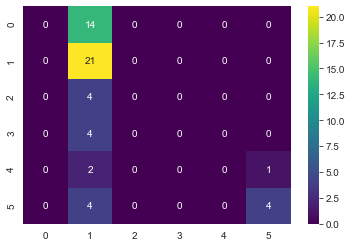

In [126]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot = True, cmap = 'viridis', fmt = '.0f')
plt.show()

# MLP CLassifier

In [127]:
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(alpha=1, max_iter=1000)

In [128]:
mlp.score(X_train, y_train)

0.7875

In [129]:
mlp.score(X_test, y_test)

0.7592592592592593

In [130]:
y_pred_dt_test = mlp.predict(X_test)

In [131]:
y_pred_dt_test

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 5, 5, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 7, 5, 1, 1, 2, 1, 7, 1, 2,
       1, 6, 2, 1, 2, 1, 1, 1, 1, 2], dtype=int64)

In [132]:
print("Accuracy Score of the MLP CLassifier Model :", metrics.accuracy_score(y_test, y_pred_dt_test))

Accuracy Score of the MLP CLassifier Model : 0.7592592592592593


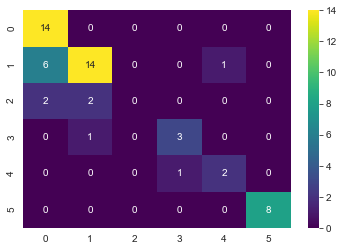

In [133]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot= True, cmap = 'viridis', fmt= '.0f')
plt.show()